In [433]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True


__Importing pre-processed data:__

In [440]:
data = pd.read_csv('pre-processed-for-visualization.csv',index_col=0 )

In [441]:
data.head()

,Booking_Date,Booking_Month,Booking_Day,Order_Amount,Check_In_Date,Checkin_Month,Checkin_Day,Total_Days,Length_of_Stay_In_Nights,Order_Status,User_Country_Name,Hotel_Country_Name,Platform
0,1/1/2018,1,1,1435,1/2/2018,1,2,5740,4,Active,Thailand,Thailand,2
1,1/1/2018,1,1,70,1/2/2018,1,2,70,1,Active,Italy,Italy,2
2,1/1/2018,1,1,284,1/3/2018,1,3,568,2,Active,Germany,Germany,2
3,1/1/2018,1,1,173,1/2/2018,1,2,173,1,Active,Germany,Germany,2
4,1/1/2018,1,1,2314,3/5/2018,3,5,11570,5,Active,France,Seychelles,2


__Platform Popularity based on total booking days: As we can see Platform 3 is way more popular.__

Text(0.5,1,'Platform Popularity')

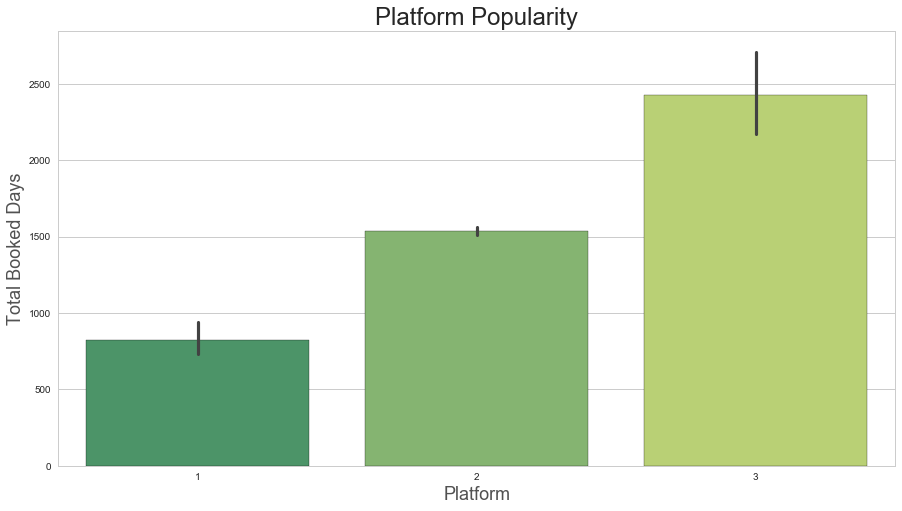

In [526]:
plt.figure(figsize=(15,8))
Platform_popularity= sns.barplot(x='Platform',y='Total_Days',data=data, palette="summer")
Platform_popularity.set_xlabel("Platform", fontsize=18, alpha=0.8)
Platform_popularity.set_ylabel("Total Booked Days", fontsize=18, alpha=0.8)
Platform_popularity.set_title("Platform Popularity", fontsize=24)

__Platform performances: As we can see in platforms 1 and 2, the number of cancellations are so much higher than active deals, whereas in platform 3 cancellations are lower than active deals that shows how much better the third platform performs.__

Text(0.5,1,"Platforms' Performance")

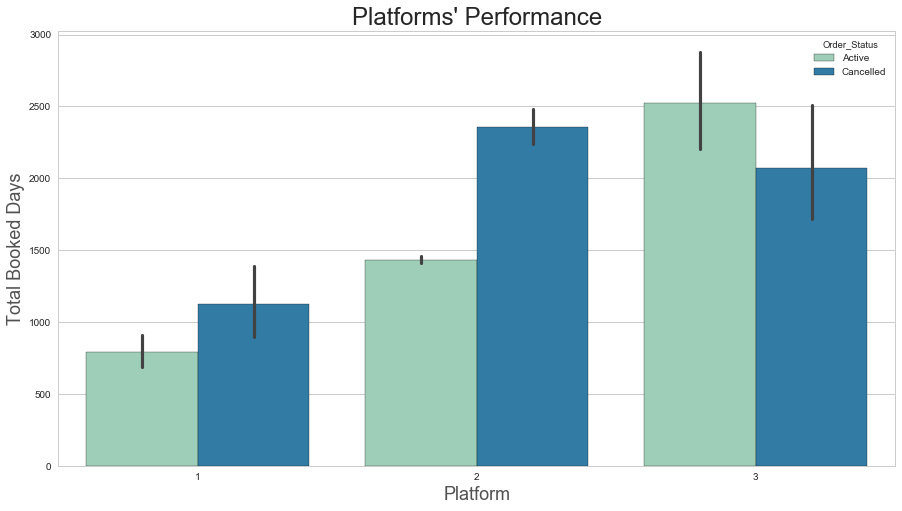

In [525]:
plt.figure(figsize=(15,8))
platform_performance = sns.barplot(x='Platform',y='Total_Days',data=data, hue="Order_Status", palette="YlGnBu"  )
platform_performance.set_xlabel("Platform", fontsize=18, alpha=0.8)
platform_performance.set_ylabel("Total Booked Days", fontsize=18, alpha=0.8)
platform_performance.set_title("Platforms' Performance", fontsize=24)

__Importing countries ranking per total days:__

In [508]:
rank = pd.read_csv('countries_rank.csv',index_col=0 )
rank.head(20)

,User_Country_Name,Total_Days
0,United States,76011654
1,Australia,34550535
2,Germany,13017211
3,United Kingdom,11340714
4,Canada,5327788
5,France,4932744
6,South Korea,4390787
7,Italy,4255267
8,Brazil,3907063
9,New Zealand,3817841


Text(0.5,1,'Top Countries Based on Total Days')

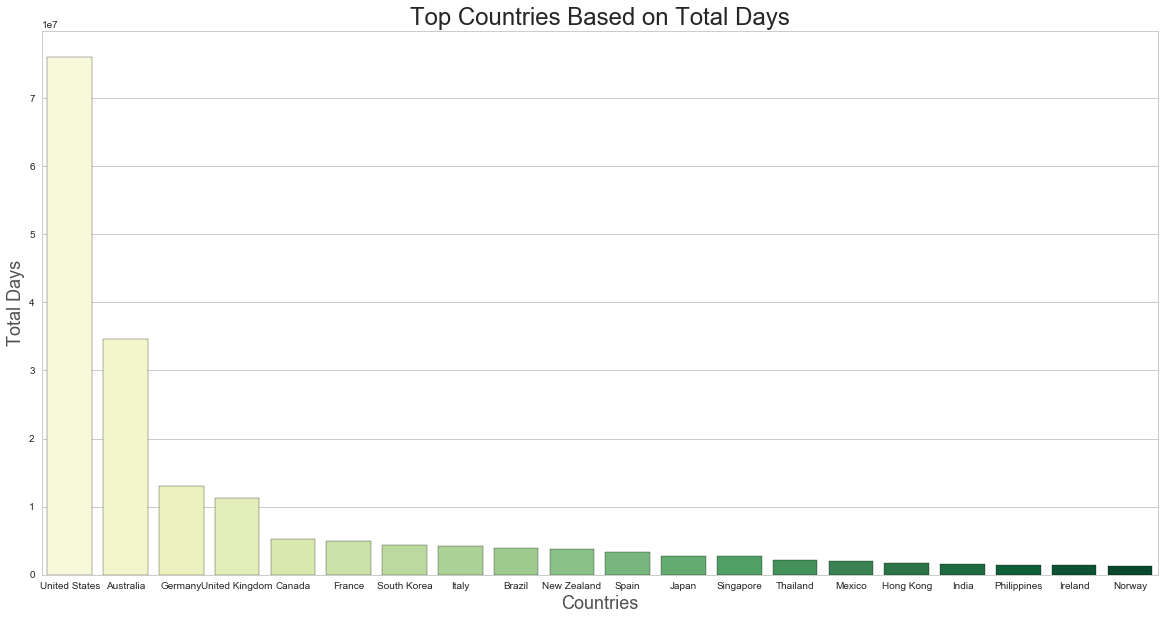

In [519]:
plt.figure(figsize=(20,10))

country_rank = sns.barplot(x='User_Country_Name',y='Total_Days',data=rank, palette="YlGn"  )
country_rank.set_xlabel("Countries", fontsize=18, alpha=0.8)
country_rank.set_ylabel("Total Days", fontsize=18, alpha=0.8)
country_rank.set_title("Top Countries Based on Total Days", fontsize=24)


In [506]:
performance_rank = pd.read_csv('countries_performance_ranking.csv',index_col=0)
performance_rank.head()

,User_Country_Name,Active,Cancelled,Sum,Performance
0,Norway,2420,5958,8378,28
1,France,961,2300,3261,29
2,Philippines,880,1952,2832,31
3,United Kingdom,1782,3966,5748,31
4,Japan,1897,3931,5828,32


Text(0.5,1,'Lowest Performing Countries(In terms of cancellation)')

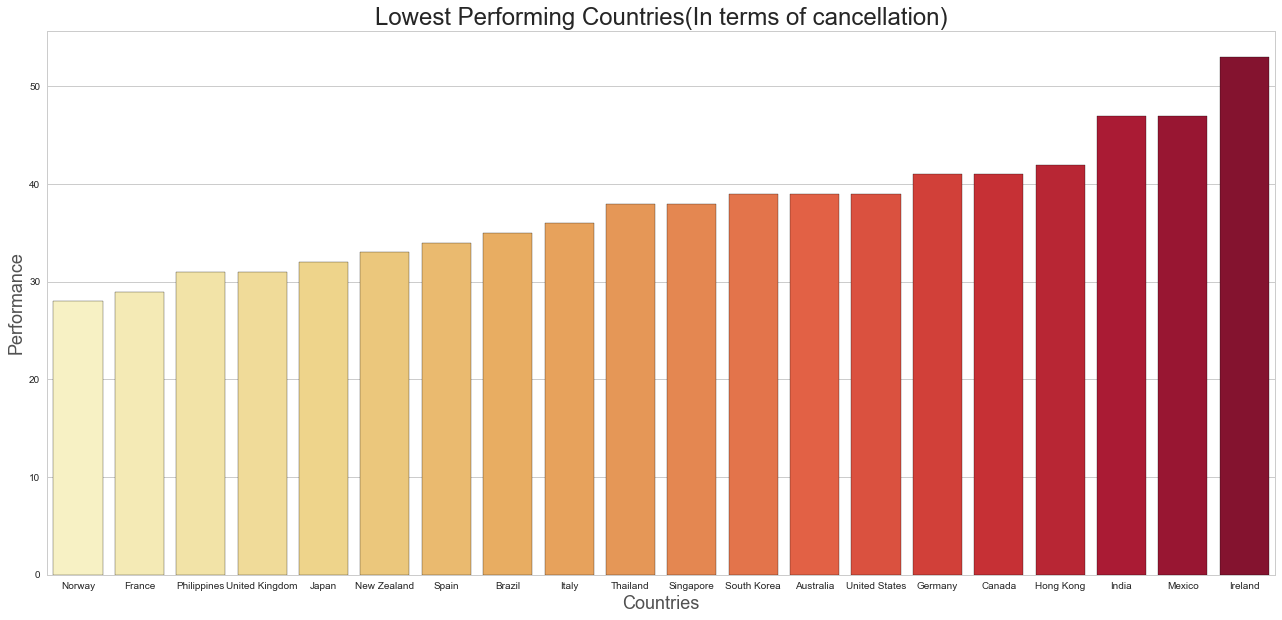

In [518]:
plt.figure(figsize=(22,10))

performance_ranking = sns.barplot(x='User_Country_Name',y='Performance',data=performance_rank, palette="YlOrRd" )
performance_ranking.set_xlabel("Countries", fontsize=18, alpha=0.8)
performance_ranking.set_ylabel("Performance", fontsize=18, alpha=0.8)
performance_ranking.set_title("Lowest Performing Countries(In terms of cancellation)", fontsize=24)

In [475]:
print('As we can see for example in the UK which is among one of the highest ccountries in terms of booking days, there are a lot of booking days, however, so many of them are being cancelled, there must be a reason for it that the company should figure out. There is a similar situation in France more and less.')

As we can see for example in the UK which is among one of the highest ccountries in terms of booking days, there are a lot of booking days, however, so many of them are being cancelled, there must be a reason for it that the company should figure out. There is a similar situation in France more and less.


In [484]:
print('In case of the UK, we can compare it with Australia, that has a very good performance and low cancellation rate, we can check different features of both markets, since they have a lot of similarities in language and culture, this comparison can give us good insights.')

In case of the UK, we can compare it with Australia, that has a very good performance and low cancellation rate, we can check different features of both markets, since they have a lot of similarities in language and culture, this comparison can give us good insights.


__Lets see how was each countrys trend in different months:__ 

In [483]:
booking_country_month= data.pivot_table(index='Booking_Month',columns='User_Country_Name',values='Total_Days',fill_value=0).astype(int)
booking_country_month

User_Country_Name,Australia,Brazil,Canada,France,Germany,Hong Kong,India,Ireland,Italy,Japan,Mexico,New Zealand,Norway,Philippines,Singapore,South Korea,Spain,Thailand,United Kingdom,United States
Booking_Month,,,,,,,,,,,,,,,,,,,,
1,2678,3453,2118,2006,1850,976,2736,3424,1231,1983,1780,1871,3199,839,924,1500,1769,1440,2291,1841
2,2122,1896,1796,1610,1880,1367,1488,1509,1380,2604,1048,1499,4011,807,885,1339,1337,1750,2444,1757
3,1950,1113,1273,849,1444,2310,1386,1253,1238,1980,1049,1382,2358,882,1054,1753,1042,1052,1559,1272
4,1989,814,1418,924,1557,1218,710,1222,1263,2224,857,1245,1798,1311,981,1661,842,801,2012,1374


Text(0.5,1,"Countries' booking trends during the 4 month period")

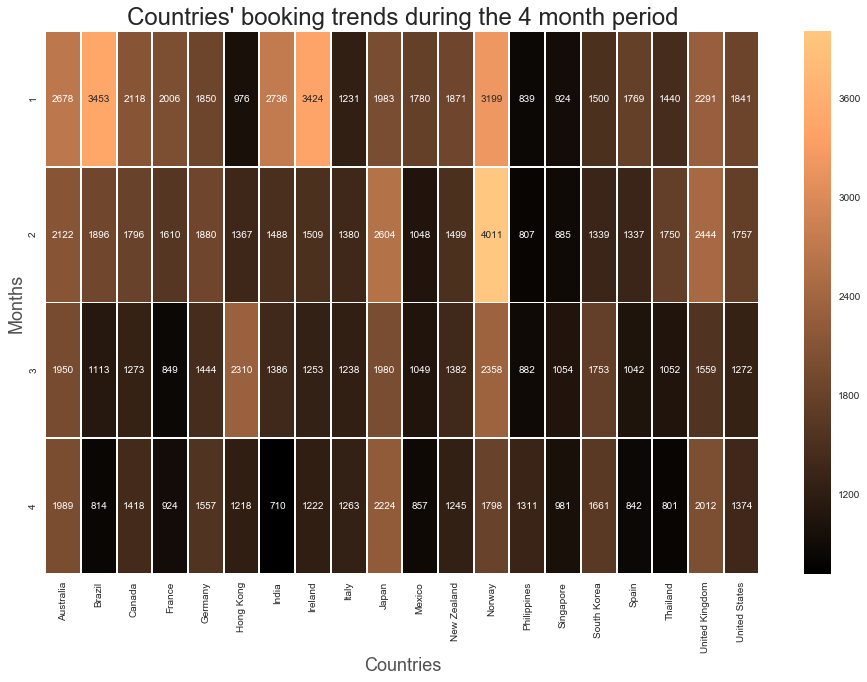

In [509]:
plt.figure(figsize=(16,10))
heatmap_months = sns.heatmap(booking_country_month,cmap='copper',linecolor='white',linewidth=1,annot=True,fmt='g')
#sns.heatmap(CTP,cmap='copper',linecolor='white',linewidth=1,annot=True,fmt='g')
heatmap_months.set_xlabel("Countries", fontsize=18, alpha=0.8)
heatmap_months.set_ylabel("Months", fontsize=18, alpha=0.8)
heatmap_months.set_title("Countries' booking trends during the 4 month period", fontsize=24)

In [513]:
print('the chart above can give us very imprtant insights. for example, Norway performed so well for the first two months but suddenly the performance has dropped.')

the chart above can give us very imprtant insights. for example, Norway performed so well for the first two months but suddenly the performance has dropped.


In [515]:
all_cancelled = pd.read_csv('all_cancelled.csv',index_col=0 )
all_cancelled = all_cancelled.pivot_table(index='Booking_Month',columns='User_Country_Name',values='Total_Days',fill_value=0).astype(int)

all_cancelled

User_Country_Name,Australia,Brazil,Canada,France,Germany,Hong Kong,India,Ireland,Italy,Japan,Mexico,New Zealand,Norway,Philippines,Singapore,South Korea,Spain,Thailand,United Kingdom,United States
Booking_Month,,,,,,,,,,,,,,,,,,,,
1,3509,4861,2366,4882,3068,648,1127,1920,1698,1623,2020,4233,2513,2330,1368,2009,1315,1297,2506,2181
2,2958,2583,2693,2207,2092,2621,3171,1090,1404,5300,1260,1578,12576,1065,1041,1555,2026,3269,5112,2491
3,3685,1633,1535,1777,1815,3070,1504,1348,3500,2404,783,3796,1049,2431,1723,2952,2024,1472,3231,2001
4,2327,1568,2142,2094,1981,1376,739,1531,1620,7324,744,1069,1167,2017,1556,1927,1761,988,5181,1919


 __Now its time to see how was the cancellation trend for each country during the 4 month period:__
What is important is, Norway in the second month had exceptionally high rate of cancellation (12576) which is so unusual, but in order for other figures to be comparable, I replaced Norway's second month with the average of Norway for 4 months.

In [503]:
all_cancelled = pd.read_csv('all_cancelled.csv',index_col=0 )
all_cancelled = all_cancelled.pivot_table(index='Booking_Month',columns='User_Country_Name',values='Total_Days',fill_value=0).astype(int)
average_norway = all_cancelled['Norway'].mean().astype(int)
all_cancelled = all_cancelled.replace(12576,average_norway)
all_cancelled

User_Country_Name,Australia,Brazil,Canada,France,Germany,Hong Kong,India,Ireland,Italy,Japan,Mexico,New Zealand,Norway,Philippines,Singapore,South Korea,Spain,Thailand,United Kingdom,United States
Booking_Month,,,,,,,,,,,,,,,,,,,,
1,3509,4861,2366,4882,3068,648,1127,1920,1698,1623,2020,4233,2513,2330,1368,2009,1315,1297,2506,2181
2,2958,2583,2693,2207,2092,2621,3171,1090,1404,5300,1260,1578,4326,1065,1041,1555,2026,3269,5112,2491
3,3685,1633,1535,1777,1815,3070,1504,1348,3500,2404,783,3796,1049,2431,1723,2952,2024,1472,3231,2001
4,2327,1568,2142,2094,1981,1376,739,1531,1620,7324,744,1069,1167,2017,1556,1927,1761,988,5181,1919


__Heat map of countries cancellation rates per month:__

Text(0.5,1,"Countries' cancellation trends during the 4 month period")

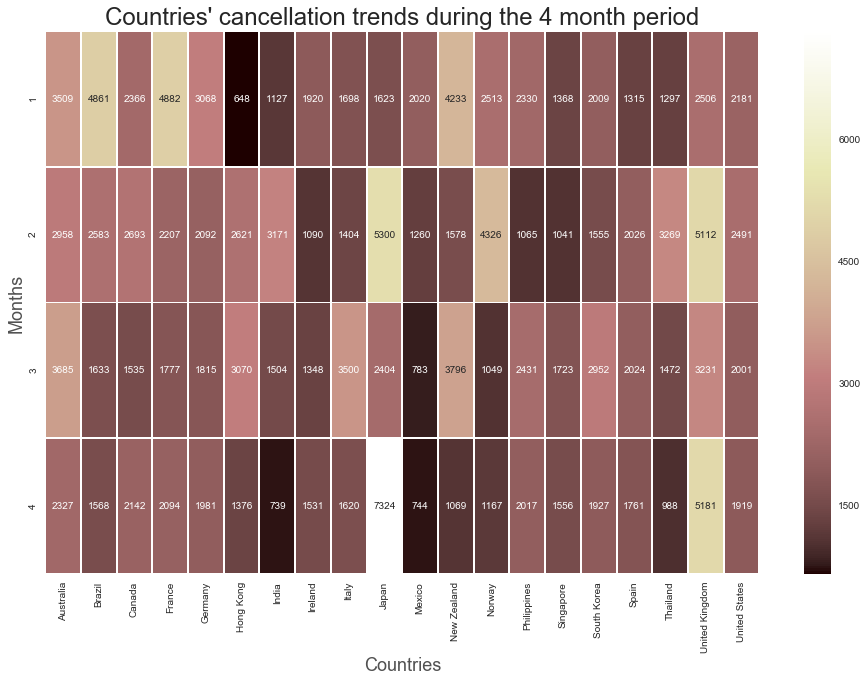

In [512]:
plt.figure(figsize=(16,10))
heatmap_months = sns.heatmap(all_cancelled,cmap='pink',linecolor='white',linewidth=1,annot=True,fmt='g')
heatmap_months.set_xlabel("Countries", fontsize=18, alpha=0.8)
heatmap_months.set_ylabel("Months", fontsize=18, alpha=0.8)
heatmap_months.set_title("Countries' cancellation trends during the 4 month period", fontsize=24)

This chart also gives us good insight about trends, for example in New Zealand we had high cancellation rates in first and third months. or what happened in Japan on the fourth month so that there is a very high cancellation rate.